# Introdução

As transformações aplicadas em imagens cujo os objetivos são mudanças nas características espaciais chamam-se: transformações geométricas. Tais mudanças baseiam-se na multiplicação ponto a ponto das coordenadas da imagem por uma matriz de transformação. É importante ressaltar queas mudanças detém-se ao espaço vetorial da imagem ($x,y$), as informações de intensidade luminosa contida nos pixels não são alteradas.

Exemplos destas transformações são: translação ($T1$), rotação ($T2$) e mudança de escala ($T3$). Representadas pelas seguintes matrizes de transformação:

$$ T1 = \left[ \begin{array}{ccc}
1 & 0 & tx \\
0 & 1 & ty \end{array} \right]\ $$

$$ T2 = \left[ \begin{array}{ccc}
cos\theta & -sin\theta  \\
sin\theta & cos\theta \end{array} \right]\ $$

$$ T3 = \left[ \begin{array}{ccc}
cx & 0 & 0  \\
0 & cy & 0 \\ 
0 & 0 & 0 \end{array} \right]\ $$

# Discussões sobre os métodos:

As transformações geométricas são operação elementares, porém úteis quando há necessário realizar mudanças no espaço de entrada a imagem, modificando a forma atual da imagem, seja por uma translação, rotação ou mudança de escala, por exemplo.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

- Abrir imagem:

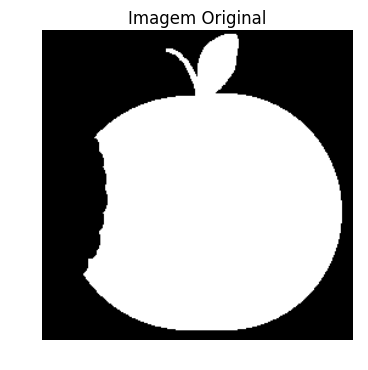

In [19]:
img = np.array(cv2.imread('apple-18.png', cv2.IMREAD_GRAYSCALE))
rows, cols = img.shape

plt.figure(1)
plt.imshow(img, 'gray')
plt.axis('OFF')
plt.title('Imagem Original')
plt.show()

In [89]:
seed_pos = np.array([np.int(rows/2), np.int(cols/2)])
seed_value = img[seed[0],seed[1]]
print(seed_value)

255


In [125]:
pixel = np.zeros((256*256,2))
print(pixel)

[[ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]
 ..., 
 [ 0.  0.]
 [ 0.  0.]
 [ 0.  0.]]


In [120]:
#3+1 conectados
kernel = np.zeros((3,3))

for l in range (-1,2):
    for k in range(-1,2):
        kernel[l,k] = img[seed_pos[1]+l][seed_pos[0]+k]
        
        if kernel[l,k] == seed_value:
                pixel = np.append(pixel, [np.array([seed_pos[1]+l,seed_pos[0]+k]]), axis=0)
        
        
        '''
        print('Linha:')
        print(center[1]+l)
        print('Coluna:')
        print(center[0]+k)
        print('----------')
for l in range (0,3):
    for k in range(0,3):
        if kernel[l,k] == seed_value:
          '''   
        


#img[center[0],center[1]]
print(kernel)

[[ 255.  255.  255.]
 [ 255.  255.  255.]
 [ 255.  255.  255.]]


In [122]:
print(pixel)

[129 129 127 127 127 128 127 129 128 127 128 128 128 129 129 127 129 128
 129 129 127 127 127 128 127 129 128 127 128 128 128 129 129 127 129 128
 129 129]


## 

## Translação

- Criar matriz de transformação:

In [30]:
tx = 20
ty = 20

Mt = np.float32([[1, 0, tx],
                [0, 1, ty]])

imgT1 = cv2.warpAffine(img, Mt, (cols, rows))

tx = 20*2
ty = 20*2

Mt = np.float32([[1, 0, tx],
                [0, 1, ty]])

imgT2 = cv2.warpAffine(img, Mt, (cols, rows))

tx = 20*3
ty = 20*3

Mt = np.float32([[1, 0, tx],
                [0, 1, ty]])

imgT3 = cv2.warpAffine(img, Mt, (cols, rows))

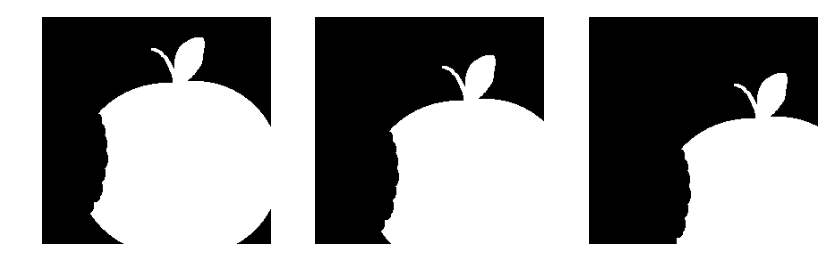

In [34]:
plt.figure(2, figsize=(10,8))
plt.subplot(131)
plt.imshow(imgT1, 'gray')
plt.axis('OFF')

plt.subplot(132)
plt.imshow(imgT2, 'gray')
plt.axis('OFF')


plt.subplot(133)
plt.imshow(imgT3, 'gray')
plt.axis('OFF')

plt.show()

A operação de translação move a imagem, desde um ponto de escolha (neste caso a origem) até um ponto de destino. É uma operação útil quando há interesse em remover parte da imagem e tornar útil apenas o resultado da translação. 

O método preserva o tamanho original da imagem e por tal motivo a operação em imagens binárias preserva o objeto e constitui um novo fundo.

## Rotação

- Define centro de rotação, angulo de rotação e cria matriz de transformação

In [27]:
cr = (cols/2, rows/2)
ar = 90
Mr = cv2.getRotationMatrix2D(cr,ar,1)
imgR1 = cv2.warpAffine(img, Mr, (cols,rows))

ar = -90
Mr = cv2.getRotationMatrix2D(cr,ar,1)
imgR2 = cv2.warpAffine(img, Mr, (cols,rows))

ar = 35+10
Mr = cv2.getRotationMatrix2D(cr,ar,1)
imgR3 = cv2.warpAffine(img, Mr, (cols,rows))

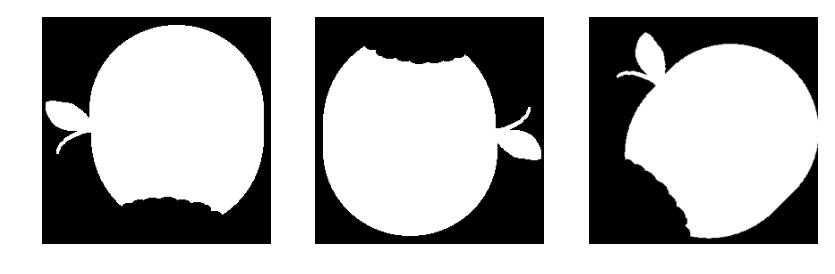

In [29]:
plt.figure(3, figsize=(10,8))
plt.subplot(131)
plt.imshow(imgR1, 'gray')
plt.axis('OFF')

plt.subplot(132)
plt.imshow(imgR2, 'gray')
plt.axis('OFF')


plt.subplot(133)
plt.imshow(imgR3, 'gray')
plt.axis('OFF')

plt.show()

Assim como a translação a rotação move a imagem em torno de um ponto de escolha. A rotação pode utilizada livremente, ser no sentido horário ou antihorário e com a inclinação desejada. O tamanho e o fundo original da imagem são preservados e há movimento apenas do objeto.

## Escala

In [60]:
colNewsize = 100
rowNewsize = 100

imgE1 = cv2.resize(img, (colNewsize,rowNewsize))

colNewsize = 300
rowNewsize = 300

imgE2 = cv2.resize(img, (colNewsize,rowNewsize))

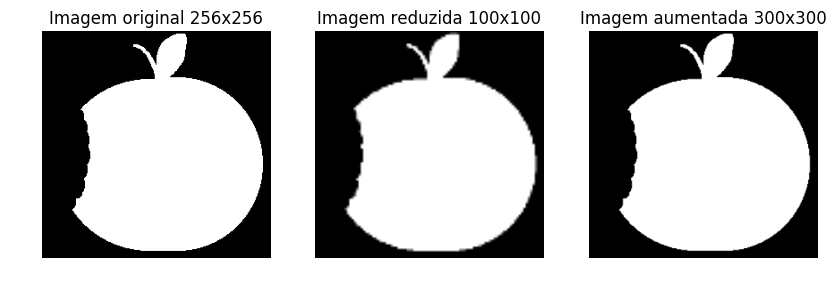

In [61]:
plt.figure(3+1, figsize=(10,8))
plt.subplot(131)
plt.imshow(img, 'gray')
plt.title('Imagem original %dx%d' % (img.shape[0], img.shape[1]))
plt.axis('OFF')

plt.subplot(132)
plt.imshow(imgE1, 'gray')
plt.title('Imagem reduzida %dx%d' % (imgE1.shape[0], imgE1.shape[1]))
plt.axis('OFF')

plt.subplot(133)
plt.imshow(imgE2, 'gray')
plt.title('Imagem aumentada %dx%d' % (imgE2.shape[0], imgE2.shape[1]))
plt.axis('OFF')

plt.show()

O método de mudança de escala trabalha de forma diferente das duas operações geométricas anteriores: O objeto e fundo são mantidos estáticos, enquanto que o tamanho da imagem é alterado. 

A baixa de qualidade na imagem reduzida dar-se perda de informações durante a redução de tamanho, que é notável ao visualizar ao a imagem representada do mesmo tamanho da original. Na imagem aumentada, também há perda de qualidade, porém menos notáveis ao representa-la do tamanho da original.

Contudo, ao representar comparando a visualização da imagem aumentada e da imagem original, para o mesmo tamanho houve uma ligeira perda de qualidade. Nota-se que a imagem aumentada sofre menos os efeitos de baixa qualidade, por tender a preservar as informações originais.

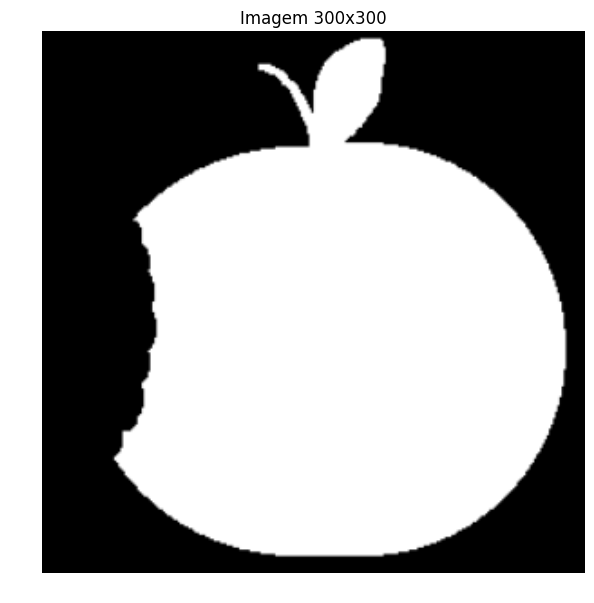

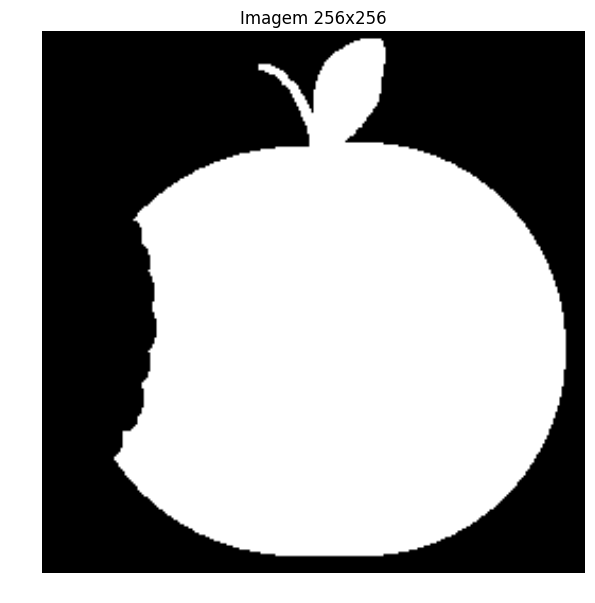

In [68]:
plt.figure(5, figsize=(7,7))
plt.imshow(imgE5, 'gray')
plt.title('Imagem %dx%d' % (imgE2.shape[0], imgE2.shape[1]))
plt.axis('OFF')
plt.show()

plt.figure(6, figsize=(7,7))
plt.imshow(img, 'gray')
plt.title('Imagem %dx%d' % (img.shape[0], img.shape[1]))
plt.axis('OFF')
plt.show()

# Conclusões:

As operações geométricas de translação, rotação e mudança de escala sou elementares, porém podem ser úteis de acordo com a necessidade. Deve-se levar em conta as característica inerentes ao métodos, com o intuito de retirar maiores resultados destas opeações.